In [1]:
pip install lightkurve

Note: you may need to restart the kernel to use updated packages.


In [75]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile("KIC 8462852" , quarter=16).download(quality_bitmask='hardest');
 # STAR NAME = 8462852 / SPECIFIC TIME = 16 > 4RT YR OF KEPLER MESSION / KIC > KEPLER MISSION

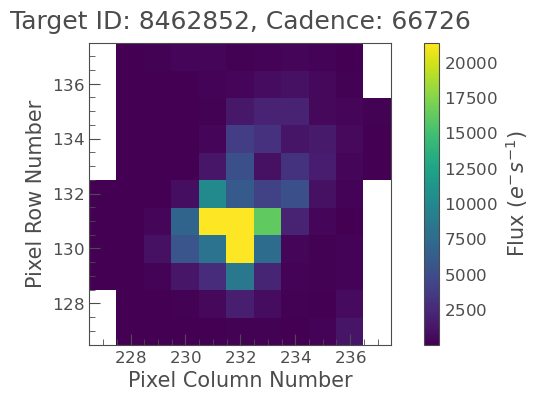

In [90]:
pixelfile.plot(frame=12);
# we are loooking at the 12th frame of the star

In [77]:
lc = pixelfile.to_lightcurve(aperture_mask='all');
# we are converting pixel data to graph like lightkurve 

In [78]:
lc.time,lc.flux
#this gives the amount of flux that star was emitting at that perticular time

(<Time object: scale='tdb' format='bkjd' value=[1472.11777934 1472.13821223 1472.15864492 ... 1557.89718798 1557.9380561
  1557.95849016]>,
 <Quantity [258645.03, 258660.05, 258690.08, ..., 258929.86, 258884.66,
            258865.6 ] electron / s>)

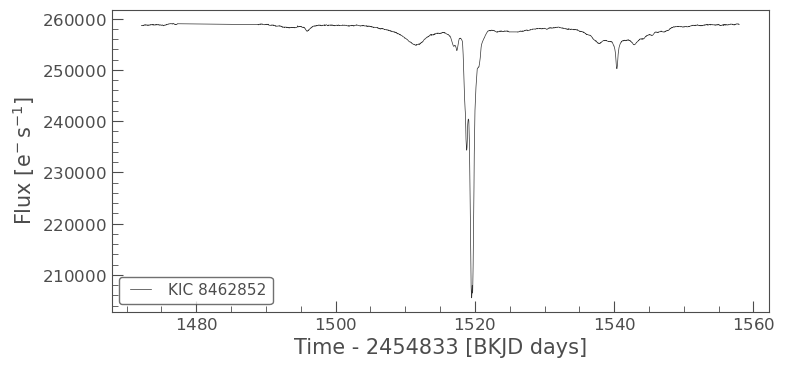

In [79]:
lc.plot();
#this gives the flux emitted by star vs time 

In [80]:
#lets lookm at the new star-6922244
pixelFile = search_targetpixelfile('KIC 6922244', quarter = 4).download()

/Users/vishwanath/opt/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:407: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [81]:
lc = pixelFile.to_lightcurve(aperture_mask=pixelFile.pipeline_mask)
#aperture_mask > it is advanced technique to get better image

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

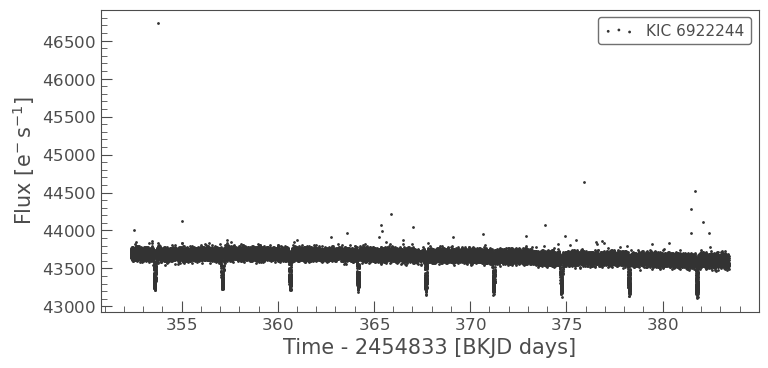

In [152]:
lc.scatter()

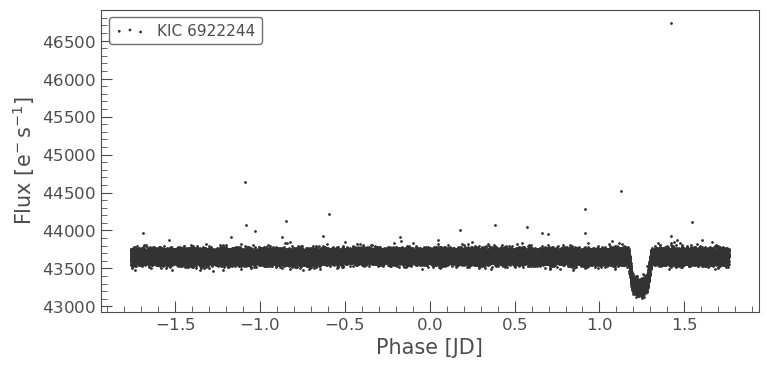

In [153]:
folded_lc = lc.fold(period=3.5225) #3.5225
folded_lc.scatter();
# period defined here is the period of planet around the star i.e. 3.5225
# in general the period defined here is the period where we are taking average for the graph.
#overlapping all the curves to get one perfect bent curve

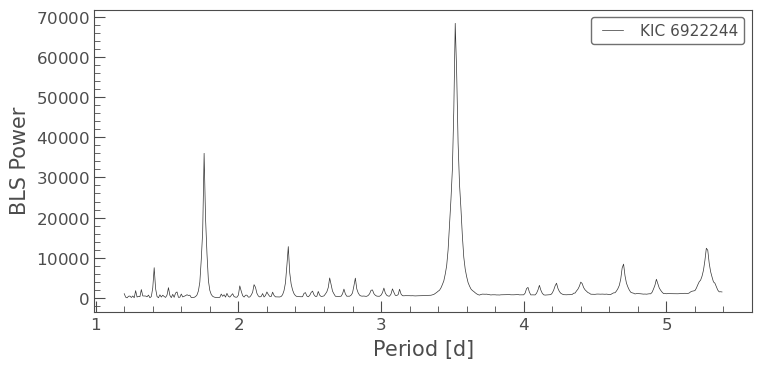

In [134]:
# to know the period of the planet using the method called periodogram
import numpy as np
'''periodogram analysis the data in the plot and plots a frequency vs type of intensity i.e. it will
give a higher peak aroud where the intenisity changed the most'''
periodogram = lc.to_periodogram(method="bls", period=np.arange(1.2, 5.4, 0.01))
#periodogram = lc.to_periodogram(method="bls", period=np.arange(0.3, 20, 0.01))
periodogram.plot();


In [155]:
best_fit_period = periodogram.period_at_max_power
other = periodogram.range(1,2.5);
print('Best fit period: ',format(best_fit_period)) 

AttributeError: 'BoxLeastSquaresPeriodogram' object has no attribute 'range'

/var/folders/1k/fjsx9wxs4m9789yy4tbk7dl80000gn/T/ipykernel_53486/1560395900.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=20)


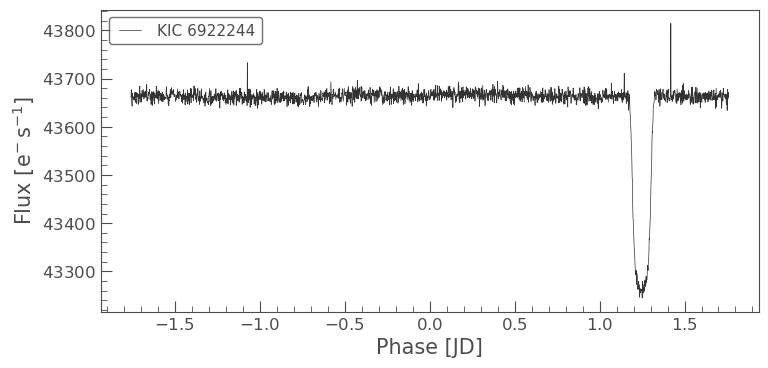

In [142]:
binned_lc = folded_lc.bin(binsize=20)
#binned_lc = folded_lc.time_bin_size(binsize=20)
binned_lc.plot();

/var/folders/1k/fjsx9wxs4m9789yy4tbk7dl80000gn/T/ipykernel_53486/2109691772.py:2: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc.remove_nans().fold(period=3.5225).bin(binsize=20).plot();


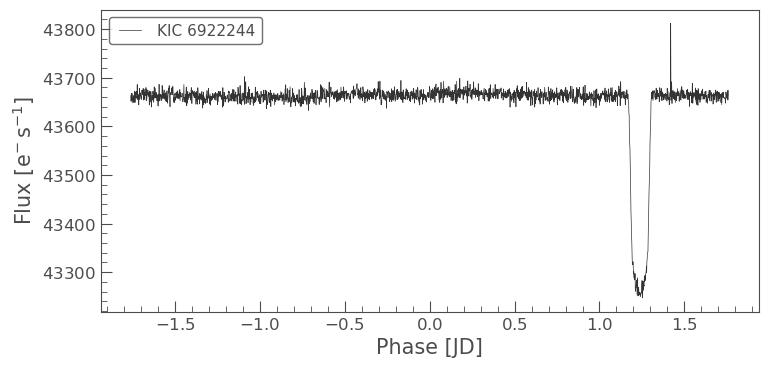

In [143]:
#single function which removes unwanted data, flatten, fold and bins 
lc.remove_nans().fold(period=3.5225).bin(binsize=20).plot();